In [1]:
from gurobipy import *
import networkx as nx
import matplotlib.pyplot as plt
import random
import math

In [2]:
#Creating a random weighted bipartite graph
def MyBipartiteGraph(n):
    RB=nx.bipartite.random_graph(math.floor(n/2),math.ceil(n/2),0.6)
    #Getting both the sets of bipartite graph
    RB_top = {n for n, d in RB.nodes(data=True) if d['bipartite']==0}
    RB_bottom = set(RB) - RB_top
    #Adding weight to the random graph to make it a weighted graph
    adding_weights=[]
    for i in RB.edges:
        i=list(i)
        i.append(random.randint(1,10))
        adding_weights.append(tuple(i))
    RB.add_weighted_edges_from(adding_weights)
    return RB,RB_top,RB_bottom,adding_weights

In [3]:
#Testing whether the graph is bipartite or not
def TestBipartiteGraph(RB):
    return (nx.is_bipartite(RB))

In [5]:
#Input the nodes from the user
n=int(input("Enter number of nodes ? "))
RB,RB_top,RB_bottom,adding_weights=MyBipartiteGraph(n)

Enter number of nodes ? 7


In [6]:
#Test whether the generated graph is bipartite or not
if TestBipartiteGraph(RB):
    print("Yes it is a bipartite graph")
else:
    print("It is not a bipartite graph")

Yes it is a bipartite graph


C:\Users\V.Bhat\AppData\Local\Continuum\anaconda3\lib\site-packages\networkx\drawing\layout.py:923: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  pos = np.row_stack((pos[x] for x in node_list))
C:\Users\V.Bhat\AppData\Local\Continuum\anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


{(0, 4): Text(-0.10256410256410253, -0.358974358974359, '7'),
 (0, 6): Text(-0.641025641025641, 0.0, '5'),
 (1, 3): Text(0.25641025641025644, -0.08974358974358974, '2'),
 (1, 4): Text(0.7051282051282052, -0.2692307692307692, '8'),
 (1, 5): Text(0.3461538461538462, 0.08974358974358974, '2'),
 (2, 3): Text(-0.10256410256410252, 0.08974358974358974, '6'),
 (2, 5): Text(-0.012820512820512775, 0.2692307692307692, '8'),
 (2, 6): Text(-0.19230769230769226, 0.2692307692307692, '10')}

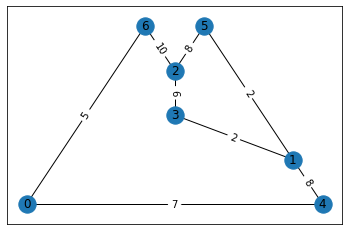

In [7]:
# Plot the weighted graph.
# If this cell shows an error "G is not planar" its because networkx is unable to draw the weighted graph.
# The graph is created but networkx is unable to draw it. Continue with further cells for graph.

pos=nx.planar_layout(RB)
nx.draw_networkx(RB,pos)
labels = nx.get_edge_attributes(RB,'weight')
nx.draw_networkx_edge_labels(RB,pos,edge_labels=labels)

In [8]:
print("Nodes in 1st set : "+str(RB_top))
print("Nodes in 2nd set : "+str(RB_bottom))

Nodes in 1st set : {0, 1, 2}
Nodes in 2nd set : {3, 4, 5, 6}


In [9]:
print("The edges are : "+str(RB.edges))

The edges are : [(0, 4), (0, 6), (1, 3), (1, 4), (1, 5), (2, 3), (2, 5), (2, 6)]


In [10]:
#We created random weights in the adding_weights list
#We store the weight of all the edges in weight_matrix
weight_matrix=[]
for i in adding_weights:
    weight_matrix.append(i[2])

In [11]:
print("The weights of those edges are : "+str(weight_matrix))

The weights of those edges are : [7, 5, 2, 8, 2, 6, 8, 10]


In [12]:
m=Model("Maximum Weight bipartite")

Using license file C:\Users\V.Bhat\gurobi.lic
Academic license - for non-commercial use only


In [13]:
#Creating variables
C=[]
for i in range(len(RB.edges)):
    v=m.addVar(lb=0,ub=1,vtype=GRB.BINARY,name=str(i))
    C.append(v)

In [14]:
#Objective Function
obj=0
for v in range(len(C)):
    obj=obj+(C[v]*weight_matrix[v])

m.setObjective(obj,GRB.MAXIMIZE)

In [15]:
#Constraint 1: Sum of all the edges from a given node in set 1 should be 1.
for i in RB_top:
    sum=0
    for edge in range(len(RB.edges)):
        if i in list(RB.edges)[edge]:
            sum=sum+C[edge]
    m.addConstr(sum == 1, "Main Constraint")

In [16]:
#Constraint 2: Sum of all the edges from a given node in set 2 should be 2

#This constraint is for perfect matching in maximum weighted bipartite problem
#For perfect matching, even number of nodes are required. (So that both sets have equal nodes)
#Uncomment this cell for perfect matching in maximum weighted bipartite matching problem

# for i in RB_bottom:
#     sum=0
#     for edge in range(len(RB.edges)):
#         if i in list(RB.edges)[edge]:
#             sum=sum+C[edge]
#     m.addConstr(sum == 1, "Main Constraint")

In [17]:
m.optimize()

Gurobi Optimizer version 9.0.2 build v9.0.2rc0 (win64)
Optimize a model with 3 rows, 8 columns and 8 nonzeros
Model fingerprint: 0x52ecca11
Variable types: 0 continuous, 8 integer (8 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e+00, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Presolve removed 3 rows and 8 columns
Presolve time: 0.00s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.01 seconds
Thread count was 1 (of 8 available processors)

Solution count 1: 25 

Optimal solution found (tolerance 1.00e-04)
Best objective 2.500000000000e+01, best bound 2.500000000000e+01, gap 0.0000%


In [18]:
for i in range(len(C)):
    if C[i].x:
        print("The edge "+str(list(RB.edges)[i])+" is selected")

The edge (0, 4) is selected
The edge (1, 4) is selected
The edge (2, 6) is selected


In [19]:
print("The value of the maximum weight matching is : "+str(m.objVal))

The value of the maximum weight matching is : 25.0
